In [1]:
pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 MB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.9/813.9 kB 65.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 20.5 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.7.0.72
    Uninstalling opencv-python-headless-4.7.0.72:
      Successfully uninstalled opencv-python-headless-4.7.0.72


In [2]:
pip install git+https://github.com/JaidedAI/EasyOCR.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/JaidedAI/EasyOCR.git to /tmp/pip-req-build-vqrtwg5k
  Running command git clone --filter=blob:none --quiet https://github.com/JaidedAI/EasyOCR.git /tmp/pip-req-build-vqrtwg5k
  Resolved https://github.com/JaidedAI/EasyOCR.git to commit 5c68ae4b3f273500dbcfeb06832415d8704020d1
  Preparing metadata (setup.py) ... done


In [4]:
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu117

Looking in indexes: https://download.pytorch.org/whl/cu117, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
from google.colab.patches import cv2_imshow
import cv2
import os
from matplotlib import pyplot as plt
import numpy as np

In [6]:
from google.colab import drive

In [7]:
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import easyocr
reader = easyocr.Reader(['en']) # this needs to run only once to load the model into memory
img = cv2.imread('/content/drive/MyDrive/naren.jpg')
result = reader.readtext(img, detail = 1, paragraph = False)
print(result)

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete[([[171, 127], [695, 127], [695, 254], [171, 254]], '3T4rr', 0.21052697352531158), ([[754, 101], [1192, 101], [1192, 273], [754, 273]], 'f@tt', 0.2625305652618408), ([[1719, 132], [2074, 132], [2074, 252], [1719, 252]], 'MRT', 0.4898327284879834), ([[2145, 128], [2605, 128], [2605, 253], [2145, 253]], 'RRER', 0.13897065818309784), ([[137, 275], [1182, 275], [1182, 396], [137, 396]], 'INCOME TAX DEPARTMENT', 0.9871997280884404), ([[1736, 271], [2594, 271], [2594, 396], [1736, 396]], 'GOVT OF INDIA', 0.9959166310725075), ([[827, 484], [1642, 484], [1642, 588], [827, 588]], 'FeTyf (T TE4T &T&', 0.048469201600140406), ([[674, 595], [1768, 595], [1768, 680], [674, 680]], 'Permanent Account Number Card', 0.8171542896275905), ([[913, 728], [1549, 728], [1549, 820], [913, 820]], 'MPIPS4462M', 0.9998677528341173), ([[119, 978], [438, 978], [438, 1053], [119, 1053]], '7A / Name', 0.47160769356801024), ([[124, 1045], [7

In [10]:
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX

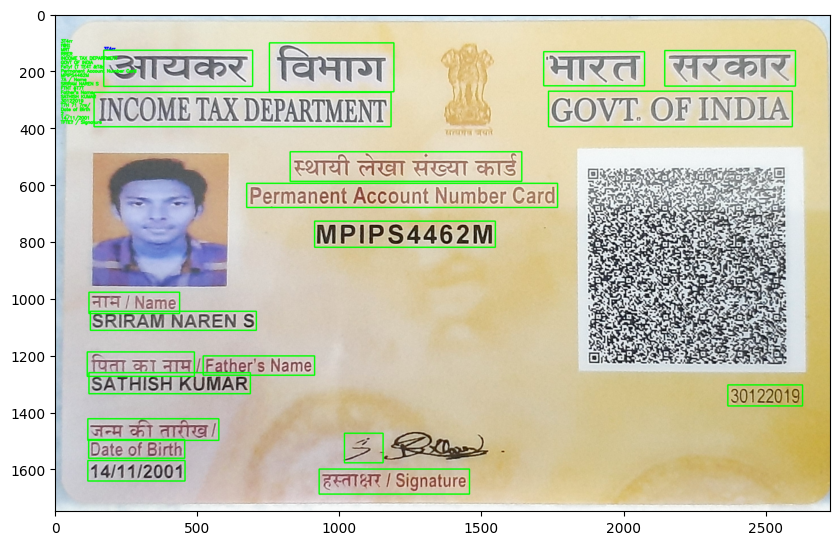

In [12]:
'''spacer = 100
for detection in result: 
    top_left = tuple(detection[0][0])
    bottom_right = tuple(detection[0][2])
    text = detection[1]
    img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
    img = cv2.putText(img,text,(20,spacer), font, 0.5,(0,255,0),2,cv2.LINE_AA)
    spacer+=15
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()'''

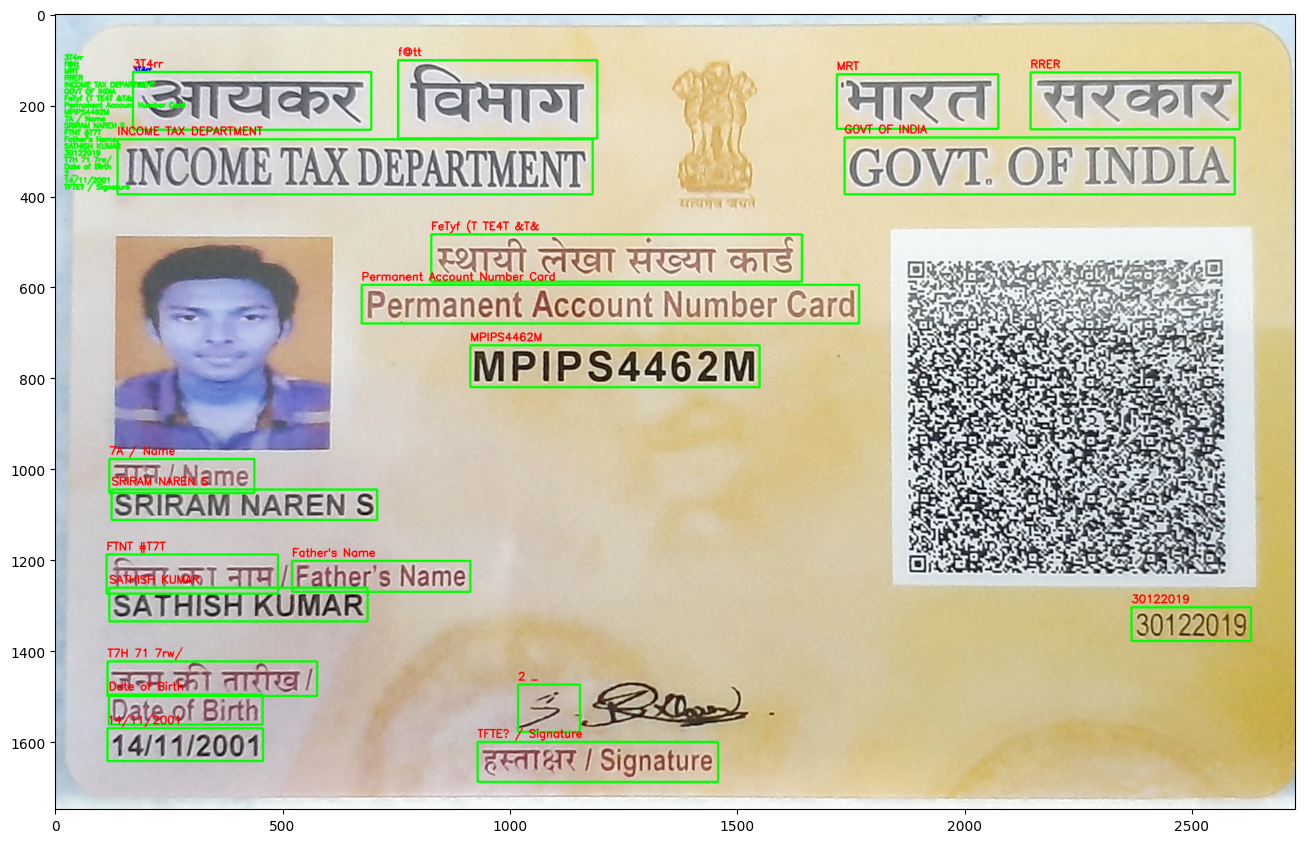

In [14]:
for (bbox, text, prob) in result: 
  # unpack the bounding box
  (tl, tr, br, bl) = bbox
  tl = (int(tl[0]), int(tl[1]))
  tr = (int(tr[0]), int(tr[1]))
  br = (int(br[0]), int(br[1]))
  bl = (int(bl[0]), int(bl[1]))
  cv2.rectangle(img, tl, br, (0, 255, 0), 2)
  cv2.putText(img, text, (tl[0], tl[1] - 10),
    cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)
plt.rcParams['figure.figsize'] = (16,16)
plt.imshow(img)

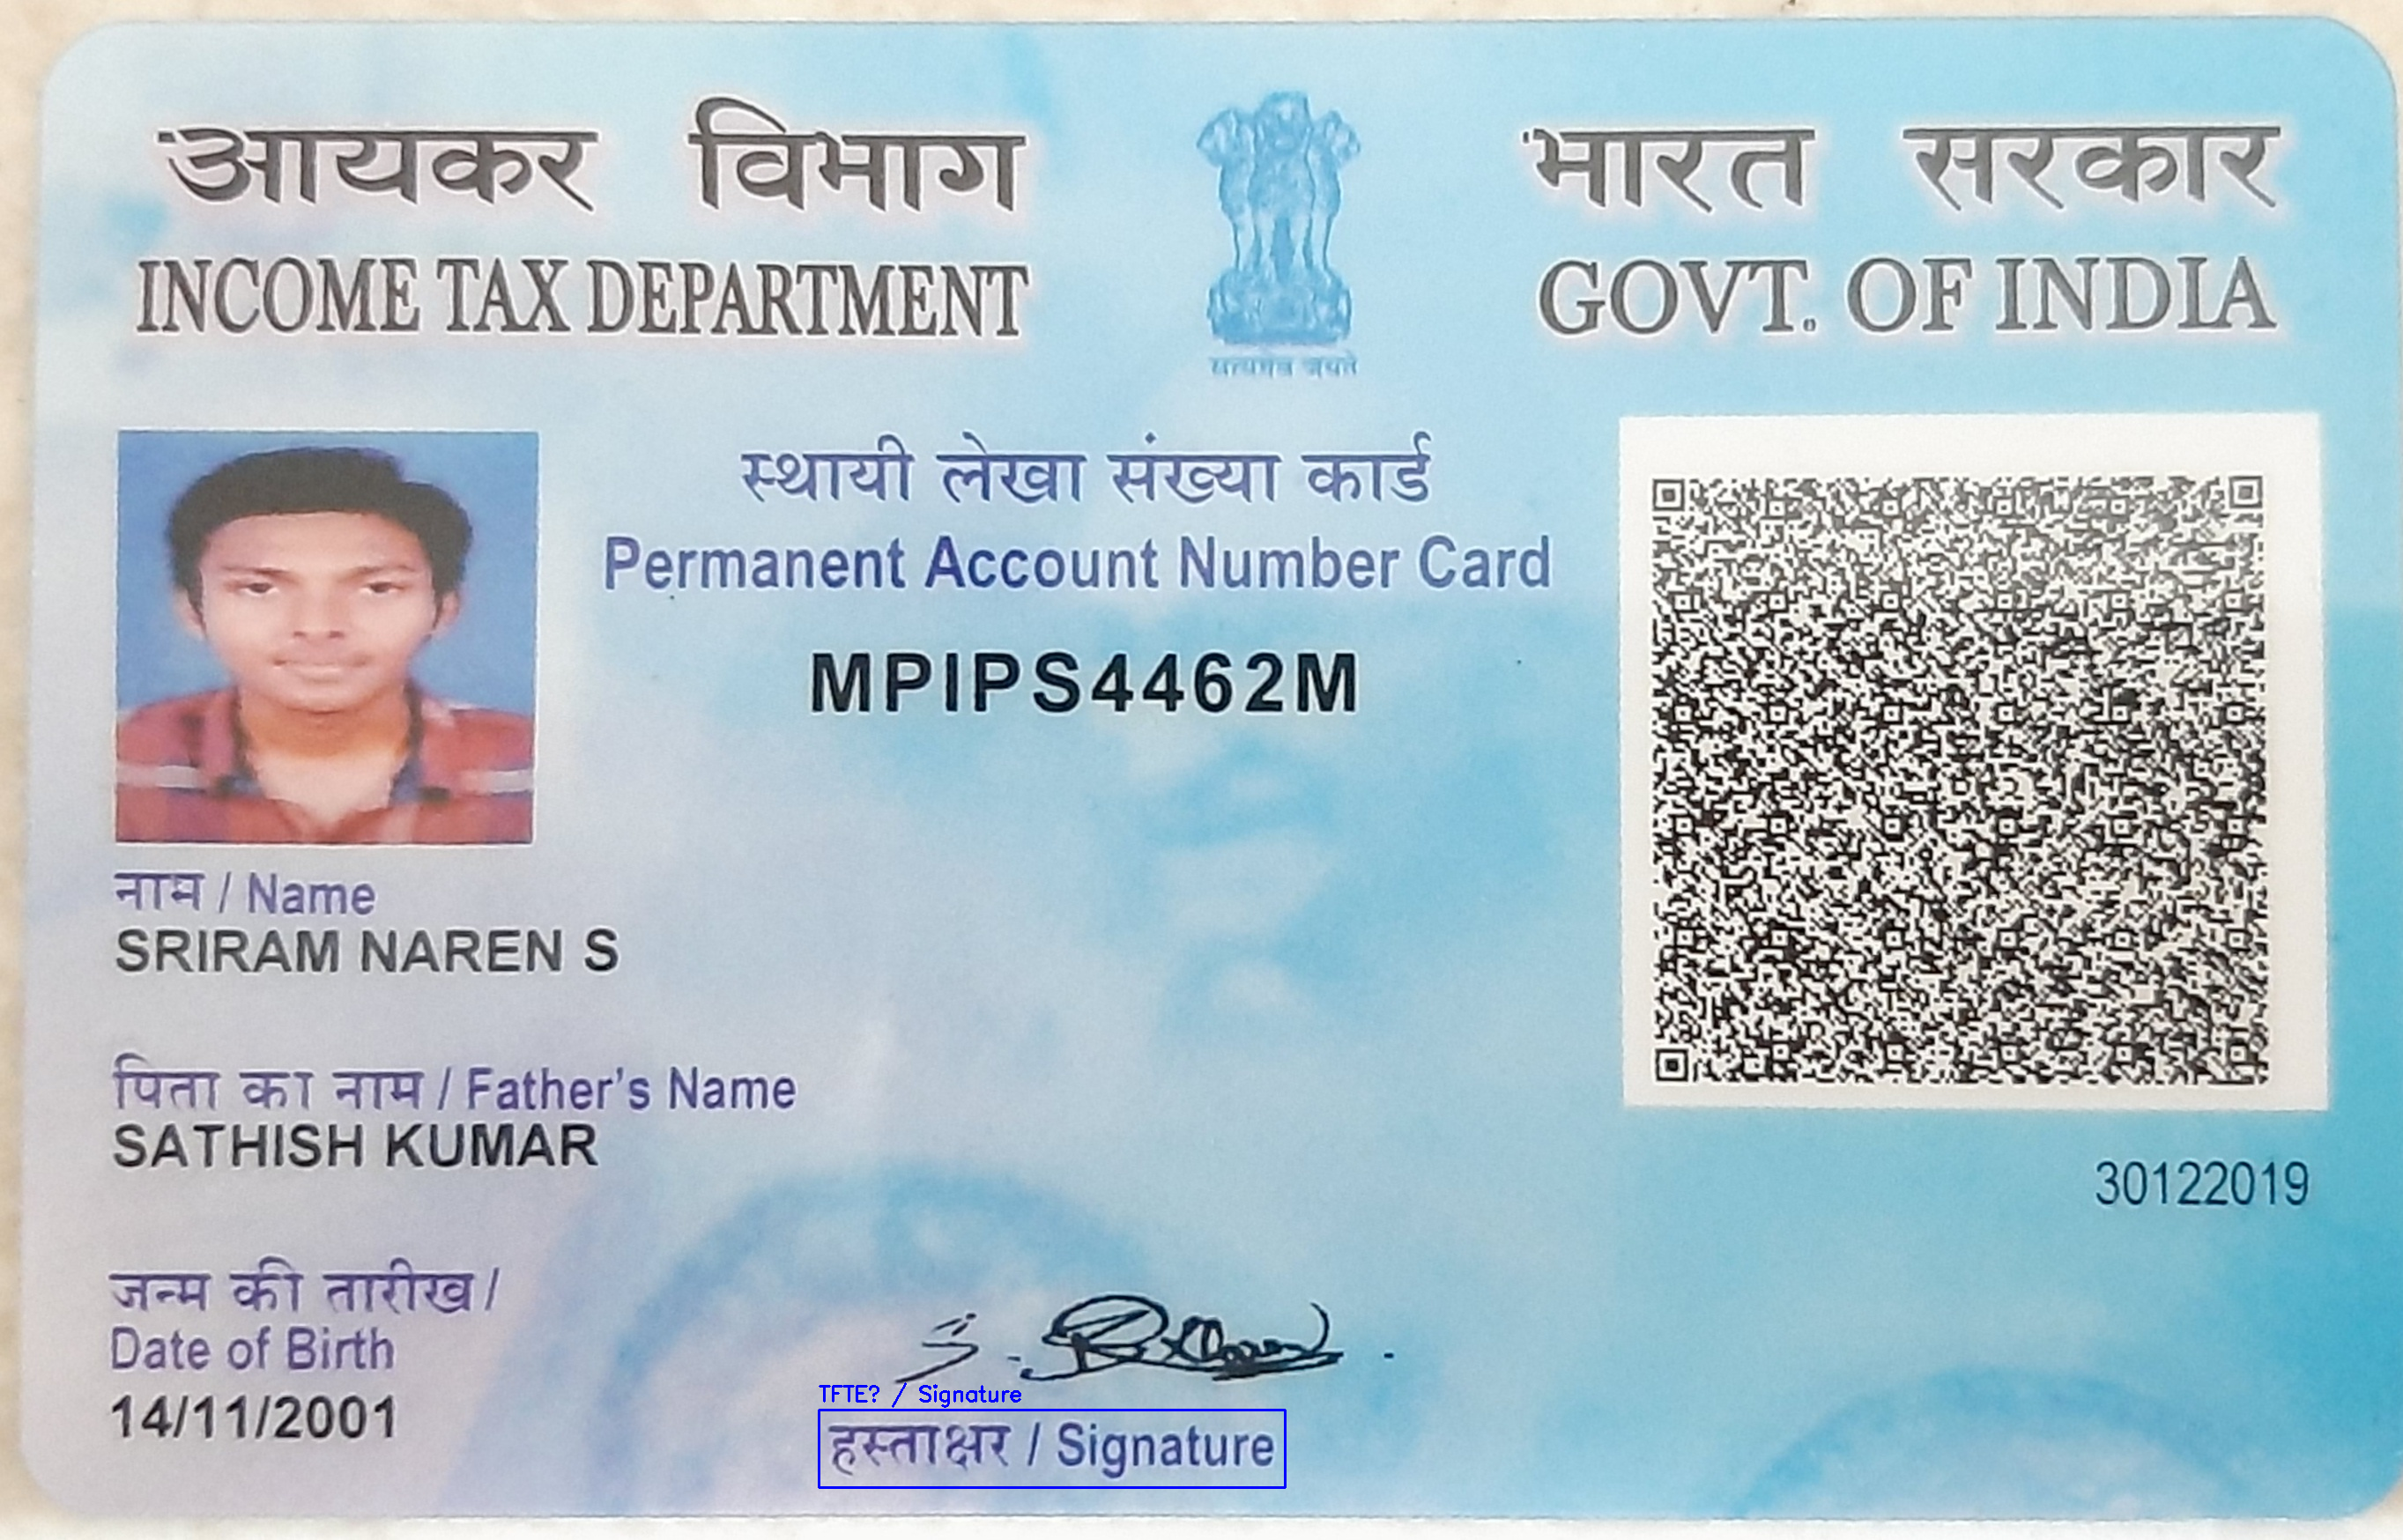

In [ ]:
'''for (bbox, text, prob) in result:
    (tl, tr, br, bl) = bbox
    tl =(int(tl[0]), int(tl[1]))
    tr =(int(tr[0]), int(tr[1]))
    br =(int(br[0]), int(br[1]))
    bl =(int(bl[0]), int(bl[1]))

text = "".join([c if ord(c) < 128 else "" for c in text]).strip()

cv2.rectangle(img, tl, br, (0,255, 0), 2)
cv2.putText(img, text, (tl[0], tl[1] - 10),
           cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
cv2_imshow(img)'''